# U.S. Medical Insurance Costs

In this project, we will be inspecting the insurance dataset, and performing analysis on its contents. The goals of this project are:
1. Explore average age:
    - average age of people with coverage
    - average age of people wiith coverage who smoke
    - average age of people with children
1. Explore cost vs age:
    - average cost of coverage sorted by age and smoker status
1. Explore effect of gender:
    - average cost by gender
    - average cost by gender and age
1. Explore gender vs child-bearing:
    - average age of someone with kids by gender
    - average age of someone without kids by gender

- Import the modules that we think we'll want to use in this notebook
- Read the file

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import csv

#read the file
pddata = pd.read_csv('insurance.csv')
with open('insurance.csv') as ins_file:
    insurance_data_str = ins_file.readlines()

- Now we start to clean up the data we're working with. We want to store the data as a dictionary, and the keys we're using are going to be pulled from the csv file the data is stored in. That way, if we get a new data set, as long as it has a header, it will get parsed by this script

In [ ]:
#PARSE THE DATA

#collect the first row as header, convert it to our keys
header = insurance_data_str[0].split(',')       #data is comma-separated
keys = []
for i in range(len(header)):
    keys.append(header[i].strip('\n'))             #get rid of those pesky newlines
    if keys[i] == 'bmi': 
        keys[i] = keys[i].upper()               #this is really only here for nicer formatting
    else: keys[i] = keys[i].title()
    
#for the rest of the data, separate each part of it into its own data
#print(insurance_data_str)
insurance_data_lines = []
for i in range(1,len(insurance_data_str)):
    insurance_data_str[i] = insurance_data_str[i].strip('\n')
    insurance_data_lines.append(insurance_data_str[i].split(','))

# Make a key:value pair for all of the data. The overall dictionary is categorized by number starting with 0 and counting upwards. 
# Each entry is also a dictionary with the keys all organized as such
#insurance_data = {num:dataset for 
insurance_data = {}
for i in range(len(insurance_data_lines)):
    insurance_data[i] = dict(zip(keys, insurance_data_lines[i]))
    
#print(insurance_data)

### Now it's time to analyze the data. We'll have one cell available for each of our goals stated at the top of this exercise
1. Explore average age:
    - average age of people with coverage
    - average age of people wiith coverage who smoke
    - average age of people with children

In [ ]:
# AVERAGE AGE
age_total = 0
smoker_age_total = 0
smoker_count = 0
children_age_total = 0
children_count = 0

for entry, data in insurance_data.items():
    age_total += float(data["Age"])
    if data["Smoker"] == "yes":
        smoker_age_total += float(data["Age"])
        smoker_count += 1
    if data["Children"] != '0':
        children_age_total += float(data["Age"])
        children_count += 1


average_age = age_total/len(insurance_data)
average_smoker_age = smoker_age_total/smoker_count
average_parent_age = children_age_total/children_count

print("This dataset has {num} participants".format(num=len(insurance_data)))
print("The average age of this data set is: ", average_age)
print("The average age of smokers with insurance is: ", average_smoker_age)
print("The average age of parents is: ", average_parent_age)

2. Explore cost vs age:
    - average cost of coverage sorted by age and smoker status
        - break that down into a few things. Get average cost by age for smokers and non-smokers
        - show average cost by age separated into a dataset of smokers and non-smokers        

In [30]:
# I'm just going to mess with dataframes down here for a little bit
# Each of the lines below breaks the main dataset into a filtered dataset based on the conditions specified
males = pddata[pddata.sex =='male']
male_smokers = pddata[(pddata.sex == 'male') & (pddata.smoker == 'yes')]
male_nonsmokers = pddata[(pddata.sex == 'male') & (pddata.smoker =='no')]
females = pddata[pddata.sex == 'female']
female_smokers = pddata[(pddata.sex == 'female') & (pddata.smoker =='yes')]
female_nonsmokers = pddata[(pddata.sex == 'female') & (pddata.smoker =='no')]

# Create some buckets for 

male_age_data = {}
male_smoker_age_data = {}
male_nonsmoker_age_data = {}
female_age_data = {}
female_smoker_age_data = {}
female_nonsmokers_age_data = {}

# age_data loop
def data_by_age(frame):
    age = {}
    for index, row in frame.iterrows():
        if row["age"] not in age:
            age.update({row["age"]:{"charges":[float(row["charges"])]}})
        else: age[row["age"]]["charges"].append(float(row["charges"]))

        # Take the data from the previous code block and determine the averages
    for entry, data in age.items():
        data["Total Charges"] = sum(data["charges"])
        data["average"] = data["Total Charges"]/len(data["charges"])
    return age

age_data = data_by_age(pddata)
male_age_data = data_by_age(males)
male_smoker_age_data = data_by_age(male_smokers)
male_nonsmoker_age_data = data_by_age(male_nonsmokers)
female_age_data = data_by_age(females)
female_smoker_age_data = data_by_age(female_smokers)
female_nonsmoker_age_data = data_by_age(female_nonsmokers)

pdage_data = pd.DataFrame(age_data).T
test = pdage_data.T
pdmale_age_data = pd.DataFrame(male_age_data).T
pdmale_smoker_age_data = pd.DataFrame(male_smoker_age_data).T
pdmale_nonsmoker_age_data = pd.DataFrame(male_nonsmoker_age_data).T
pdfemale_age_data = pd.DataFrame(female_age_data).T
pdfemale_smoker_age_data = pd.DataFrame(female_smoker_age_data).T
pdfemale_nonsmoker_age_data = pd.DataFrame(female_nonsmoker_age_data).T

<Axes: ylabel='average'>

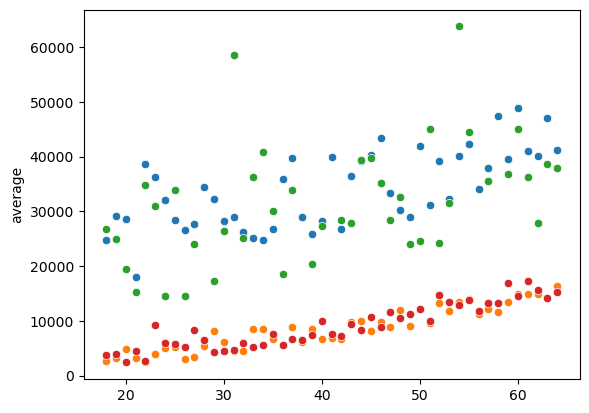

In [35]:
def average_plot_reducer(age_data):
    average_charges = ()
    average_charges = (data["average"] for column, data in age_data.items())
    df = pd.DataFrame({'age': age_data.columns, 'average_cost': average_charges})
    return df

#all_average_cost = average_plot_reducer(pdage_data)
#male_average_cost = average_plot_reducer(pdmale_age_data)
#male_smoker_average_cost = average_plot_reducer(pdmale_smoker_age_data)
#male_nonsmoker_average_cost = average_plot_reducer(pdmale_nonsmoker_age_data)
#female_average_cost = average_plot_reducer(pdfemale_age_data)
sns.scatterplot(data=pdmale_smoker_age_data, x=pdmale_smoker_age_data.index, y='average')
sns.scatterplot(data=pdmale_nonsmoker_age_data, x=pdmale_nonsmoker_age_data.index, y='average')
sns.scatterplot(data=pdfemale_smoker_age_data, x=pdfemale_smoker_age_data.index, y='average')
sns.scatterplot(data=pdfemale_nonsmoker_age_data, x=pdfemale_nonsmoker_age_data.index, y='average')
#sns.scatterplot(data=pdmale_nonsmoker_age_data, x=pdmale_nonsmoker_age_data.columns, y='average')
#sns.scatterplot(pdmale_smoker_age_data, x='age', y='charges', hue='sex')
#sns.pointplot(pddata, x='age', y='charges', hue='sex')


1. Explore effect of gender:
    - average cost by gender
    - average cost by gender and age

1. Explore gender vs child-bearing:
    - average age of someone with kids by gender
    - average age of someone without kids by gender
